In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [369]:
import warnings
warnings.filterwarnings("ignore")

In [370]:
## Read data
import os
print(os.getcwd())

/Users/kunalchakraborty/Downloads/industry_project_HQ


In [371]:
### Load training data
data = pd.read_csv("data/ag_transformed_features.csv")
## Transform date
data["date"] = data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())

In [372]:
used_features = ["dfy", "infl", "svar", "d/e", "lty", "tms", "tbl", "dfr", "d/p", "d/y", "ltr", "e/p"]
target = ["premium"]

In [373]:
data.set_index("date", inplace=True)

## Step1 : Rolling window training


#### Restrict to using sklearn features

In [374]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [375]:
data.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,...,CRSP_SPvwx,returns,premium,d/p,d/y,e/p,d/e,tms,dfy,dfr
date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,55.42,1.75667,2.96333,0.502896,0.0282,0.0412,0.0487,0.0408,0.027736,0.0021,...,0.005395,NaN,NaN,-3.451521,NaN,-2.928627,-0.522894,0.0126,0.0075,0.0052
1959-02-01,55.41,1.76333,3.03667,0.494946,0.0270,0.0414,0.0489,0.0402,0.027899,0.0019,...,0.002210,0.002471,0.000571,-3.447556,-3.447736,-2.903999,-0.543557,0.0132,0.0075,0.0009
1959-03-01,55.44,1.77000,3.11000,0.516860,0.0280,0.0413,0.0485,0.0403,0.024984,0.0022,...,0.000826,0.003203,0.001003,-3.444322,-3.443781,-2.880679,-0.563643,0.0123,0.0072,-0.0100
1959-04-01,57.59,1.77667,3.20667,0.498597,0.0295,0.0423,0.0486,0.0414,0.024361,0.0020,...,0.039093,0.041451,0.039451,-3.478608,-3.440561,-2.888116,-0.590492,0.0119,0.0063,-0.0055
1959-05-01,58.68,1.78333,3.30333,0.483077,0.0284,0.0437,0.0496,0.0417,0.025887,0.0022,...,0.019043,0.021507,0.019307,-3.493617,-3.474867,-2.877168,-0.616449,0.0133,0.0059,-0.0109


In [376]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def fix_pred_format(pred_array):
    pred_list = []
    for pred in pred_array:
        pred_list.append(pred[0])
    return pred_list

In [377]:

# ### Write a function for rolling model training. Use it for predictions as well
# def roll_training(Y,X, datelist, model, model_name, train_rolling_length = 60, test_rolling_length = 1):
#     """
#     Y : Target variable
#     X : Training data
#     """
    
#     predictions = []
#     int_start  = 0
#     for int_end in range(train_rolling_length, len(datelist), test_rolling_length):
#         # Define intervals
#         train_interval = datelist[int_start:int_end]
#         test_interval = datelist[int_end:int_end+test_rolling_length]
#         # Training data
#         Yt = Y.loc[train_interval]
#         Xt = X.loc[train_interval]
#         # Testing data
#         Xt_test = X.loc[test_interval]
#         # Normalize data
#         Xt = scaler.fit_transform(Xt)
#         Xt_test = scaler.transform(Xt_test)
        
#         model.fit(Xt,Yt)
#         # Perform prediction
#         Yt_pred = model.predict(Xt_test)
#         if model_name == "reg":
#             # Fix prediction format
#             Yt_pred = fix_pred_format(Yt_pred)
#         df_temp = pd.DataFrame([test_interval, Yt_pred]).T
#         df_temp.columns = ["date",model_name]
#         predictions.append(df_temp)
#         # Update index
#         int_start += test_rolling_length
        
#     pred_df = pd.concat(predictions)
#     return pred_df

In [378]:
# ## Check the rolling window training scheme

# ### Write a function for rolling model training. Use it for predictions as well
# def roll_training(Y,X, datelist, model, model_name, train_rolling_length = 60, test_rolling_length = 1, verbose=False):
#     """
#     Y : Target variable
#     X : Training data
#     """
    
#     predictions = []
#     int_start  = 0
#     for int_end in range(train_rolling_length, len(datelist)-1, test_rolling_length):
#         # Define intervals
#         train_interval = datelist[int_start:int_end]
#         test_interval = datelist[int_end:int_end+test_rolling_length]
#         if verbose:
#             print("Traing start date = {} and end date = {}".format(min(train_interval), max(train_interval)))
#             print("Testing start date = {} and end date = {}".format(min(test_interval), max(test_interval)))
#         # Training data
        
#         # train interval for yt would be different
#         train_interval_y = datelist[int_start+1:int_end+1]
#         test_interval_y = datelist[int_end+1:int_end+test_rolling_length+1]
#         Yt = Y.loc[train_interval_y]
#         Xt = X.loc[train_interval]
#         # Testing data
#         Xt_test = X.loc[test_interval]
#         # Normalize data
#         Xt = scaler.fit_transform(Xt)
#         Xt_test = scaler.transform(Xt_test)
        
#         model.fit(Xt,Yt)
#         # Perform prediction
#         Yt_pred = model.predict(Xt_test)
#         if model_name == "reg":
#             # Fix prediction format
#             Yt_pred = fix_pred_format(Yt_pred)
#         df_temp = pd.DataFrame([test_interval_y, Yt_pred]).T
#         df_temp.columns = ["date",model_name]
#         predictions.append(df_temp)
#         # Update index
#         int_start += test_rolling_length
        
#     pred_df = pd.concat(predictions)
#     return pred_df

In [379]:
## Check the rolling window training scheme

### Write a function for rolling model training. Use it for predictions as well
def roll_training(Y,X, datelist, model, model_name, train_rolling_length = 60, forecast_ahead = 1, test_rolling_length = 1, verbose=False):
    """
    Y : Target variable
    X : Training data
    """
    
    predictions = []
    int_start  = 0
    for int_end in range(train_rolling_length, len(datelist)-forecast_ahead, test_rolling_length):
        # Define intervals
        train_interval = datelist[int_start:int_end]
        test_interval = datelist[int_end:int_end+test_rolling_length]
        
        # train interval for yt would be different
        train_interval_y = datelist[int_start+forecast_ahead:int_end+forecast_ahead]
        test_interval_y = datelist[int_end+forecast_ahead:int_end+test_rolling_length+forecast_ahead]
        
        if verbose:
            print("Traing start date = {} and end date = {}".format(min(train_interval), max(train_interval)))
            print("Testing start date = {} and end date = {}".format(min(test_interval), max(test_interval)))
            print("Yt date  = {} and {}".format(min(train_interval_y), max(train_interval_y)))
            print("Prediction Yt date = {} and {} ".format(min(test_interval_y), max(test_interval_y)))
        Yt = Y.loc[train_interval_y]
        Xt = X.loc[train_interval]
        # Testing data
        Xt_test = X.loc[test_interval]
        # Normalize data
        Xt = scaler.fit_transform(Xt)
        Xt_test = scaler.transform(Xt_test)
        
        model.fit(Xt,Yt)
        # Perform prediction
        Yt_pred = model.predict(Xt_test)
        if model_name == "reg":
            # Fix prediction format
            Yt_pred = fix_pred_format(Yt_pred)
        df_temp = pd.DataFrame([test_interval_y, Yt_pred]).T
        df_temp.columns = ["date",model_name]
        predictions.append(df_temp)
        # Update index
        int_start += test_rolling_length
        
    pred_df = pd.concat(predictions)
    return pred_df

In [380]:
data.tail()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,...,CRSP_SPvwx,returns,premium,d/p,d/y,e/p,d/e,tms,dfy,dfr
date,,,,,,,,,,,,,,,,,,,,,
2020-08-01,3500.31,59.128628,98.556667,NaN,0.0010,0.0225,0.0327,0.0065,-0.008504,0.0001,...,0.070308,0.071571,0.071471,-4.080892,-4.013173,-3.569975,-0.510916,0.0055,0.0102,-0.0139
2020-09-01,3363.00,58.851237,98.220000,NaN,0.0011,0.0231,0.0336,0.0068,-0.005698,0.0001,...,-0.039366,-0.037827,-0.037927,-4.045576,-4.085594,-3.533379,-0.512197,0.0057,0.0105,-0.0039
2020-10-01,3269.96,58.660440,96.856667,NaN,0.0010,0.0235,0.0344,0.0079,-0.001895,0.0001,...,-0.027507,-0.026212,-0.026312,-4.020767,-4.048823,-3.519301,-0.501467,0.0069,0.0109,0.0048
2020-11-01,3621.63,58.469643,95.493333,NaN,0.0009,0.0230,0.0330,0.0087,-0.005262,0.0001,...,0.107623,0.109036,0.108936,-4.126172,-4.024025,-3.635623,-0.490549,0.0078,0.0100,0.0416
2020-12-01,3756.07,58.278846,94.130000,NaN,0.0009,0.0226,0.0316,0.0093,-0.000094,0.0001,...,0.040138,0.038462,0.038362,-4.165889,-4.129440,-3.686452,-0.479438,0.0084,0.0090,0.0115


In [381]:
data = data.drop(["b/m", "csp"], axis=1)

In [382]:
data = data.dropna()
Y = data[["premium"]]
X = data[used_features]
datelist = data.index.tolist()
from sklearn.linear_model import LinearRegression

reg = LinearRegression()


preds = roll_training(Y,X,datelist, reg,"model")

## Step 2: Write the validation scheme for such models

In [383]:
train_val_test = [0.6, 0.2, 0.2]

train_datelist = datelist[0:int(len(datelist)*train_val_test[0])]
val_datelist = datelist[int(len(datelist)*train_val_test[0]):int(len(datelist)*train_val_test[0]) 
                        + int(len(datelist)*train_val_test[1])]
test_datelist = datelist[int(len(datelist)*train_val_test[0]) 
                        + int(len(datelist)*train_val_test[1]) : ]

training_data_x = data[data.index.isin(train_datelist)][used_features]
training_data_y = data[data.index.isin(train_datelist)][target]
val_data_x = data[data.index.isin(val_datelist)][used_features]
val_data_y = data[data.index.isin(val_datelist)][target]
test_data_x = data[data.index.isin(test_datelist)][used_features]
test_data_y = data[data.index.isin(test_datelist)][target]

In [384]:
full_data_y = pd.concat([training_data_y, val_data_y, test_data_y])
full_data_x = pd.concat([training_data_x, val_data_x, test_data_x])

## Step 3: Write the optimization scheme for such models

- Get the top 3 models for every model specification
- Write Grid search model

In [385]:
np.random.seed(10)

## For linear models, plot convergence 

In [386]:
### Setup hyper-parameter space for regression

lasso_regression_hp_dict = {
       "alpha" : np.linspace(0.001,0.1,100)
}

ridge_regression_hp_dict = {
       "alpha" : np.linspace(0.001,10,100)
}

In [387]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

In [388]:
lasso_mse = []
lasso_prediction_dictionary = {}
for alpha in lasso_regression_hp_dict["alpha"]:
    lasso = Lasso(alpha = alpha)
    model_name = "lasso_alpha={}".format(alpha)
    lasso_preds = roll_training(training_data_y,training_data_x, train_datelist, lasso,model_name)
    lasso_prediction_dictionary[alpha] = lasso_preds
    ### Compute MSE
    ## Extract common datelist
    common_dates = lasso_preds["date"].tolist()
    lasso_mse.append(mean_squared_error(training_data_y[training_data_y.index.isin(common_dates)],
                                        lasso_preds[model_name]))

Text(0.5, 0, 'alpha')

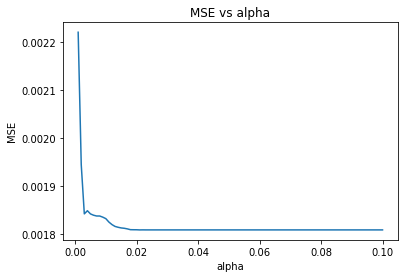

In [389]:
plt.figure()
plt.plot(lasso_regression_hp_dict["alpha"], lasso_mse)
plt.title("MSE vs alpha")
plt.ylabel("MSE")
plt.xlabel("alpha")

In [390]:
ridge_mse = []
ridge_prediction_dictionary = {}
for alpha in ridge_regression_hp_dict["alpha"]:
    ridge = Ridge(alpha = alpha)
    model_name = "ridge_alpha={}".format(alpha)
    ridge_preds = roll_training(training_data_y,training_data_x, train_datelist, ridge,model_name)
    ridge_prediction_dictionary[alpha] = ridge_preds
    ### Compute MSE
    ## Extract common datelist
    common_dates = ridge_preds["date"].tolist()
    ridge_mse.append(mean_squared_error(training_data_y[training_data_y.index.isin(common_dates)],
                                        ridge_preds[model_name]))

Text(0.5, 0, 'alpha')

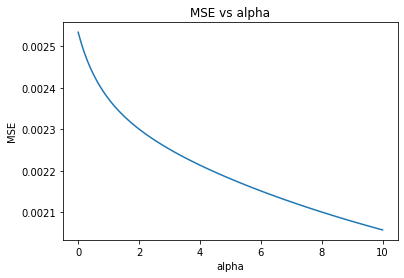

In [391]:
plt.figure()
plt.plot(ridge_regression_hp_dict["alpha"], ridge_mse)
plt.title("MSE vs alpha")
plt.ylabel("MSE")
plt.xlabel("alpha")

In [392]:
## Checking plain regression
reg = LinearRegression()
linear_preds = roll_training(training_data_y,training_data_x, train_datelist, reg,"plain_regression")
print(mean_squared_error(training_data_y[training_data_y.index.isin(common_dates)],
                                        linear_preds['plain_regression']))

0.0024513043563529732


In [ ]:
### Check results on overall data as well
lasso_mse = []
lasso_prediction_dictionary = {}
for alpha in lasso_regression_hp_dict["alpha"]:
    lasso = Lasso(alpha = alpha)
    model_name = "lasso_alpha={}".format(alpha)
    lasso_preds = roll_training(full_data_y,full_data_x, datelist, lasso,model_name)
    lasso_prediction_dictionary[alpha] = lasso_preds
    ### Compute MSE
    ## Extract common datelist
    common_dates = lasso_preds["date"].tolist()
    lasso_mse.append(mean_squared_error(full_data_y[full_data_y.index.isin(common_dates)],
                                        lasso_preds[model_name]))

In [ ]:
plt.figure()
plt.plot(lasso_regression_hp_dict["alpha"], lasso_mse)
plt.title("MSE vs alpha")
plt.ylabel("MSE")
plt.xlabel("alpha")

In [ ]:
ridge_mse = []
ridge_prediction_dictionary = {}
for alpha in ridge_regression_hp_dict["alpha"]:
    ridge = Ridge(alpha = alpha)
    model_name = "ridge_alpha={}".format(alpha)
    ridge_preds = roll_training(full_data_y,full_data_x, datelist, ridge,model_name)
    ridge_prediction_dictionary[alpha] = ridge_preds
    ### Compute MSE
    ## Extract common datelist
    common_dates = ridge_preds["date"].tolist()
    ridge_mse.append(mean_squared_error(full_data_y[full_data_y.index.isin(common_dates)],
                                        ridge_preds[model_name]))

In [ ]:
plt.figure()
plt.plot(ridge_regression_hp_dict["alpha"], ridge_mse)
plt.title("MSE vs alpha")
plt.ylabel("MSE")
plt.xlabel("alpha")

In [ ]:
## Checking plain regression
reg = LinearRegression()
linear_preds = roll_training(full_data_y,full_data_x, datelist, reg,"plain_regression")
print(mean_squared_error(full_data_y[full_data_y.index.isin(common_dates)],
                                        linear_preds['plain_regression']))

## Code for GRID search scheme

In [ ]:
random_forest_hp_dict = {
    "n_estimators" : [50,100,150,200],
    "max_depth":[2,3,5,7,10],
    "min_samples_leaf":[1,3,5,10],
}

random_forest_hp_dict_mini = {
    "n_estimators" : [25,50],
    "max_depth":[2,3],
    "min_samples_leaf":[1,3]
}

elastic_net_hp_dict = {
    "alpha" : [0.1, 0.2, 0.5, 0.7,1, 3, 10],
    "l1_ratio" : [0.1,0.3, 0.7,1]
}

xgboost_hp_dict = {
    "n_estimators" : [50,100,150,200],
    "max_depth":[2,3,5,7,10],
    "min_samples_leaf":[1,3,5,10],
}

In [ ]:
import itertools

In [ ]:
def generate_hyperparameter_grid(hp_space):

    keys, values = zip(*hp_space.items())
    experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]
    
    return experiments

### Return top k predictions for a model class

In [ ]:
mega_model_name = {}

In [ ]:
def model_name_mappers(hp_space, base_model):
    model_name_mapper1 = {}
    model_name_mapper2 = {}
    for i in range(len(hp_space)):
        model_name_mapper1[base_model + "_" + str(i)] = str(hp_space[i])
        model_name_mapper2[str(hp_space[i])] = base_model + "_" + str(i)
    return model_name_mapper1, model_name_mapper2

In [ ]:
def get_grid_model_results(base_mod, hp_space, model_name, Y, X, datelist):
    model_names_mapping1, model_names_mapping2 = model_name_mappers(hp_space, model_name)
    model_prediction_dictionary = {}
    prog_i = 0
    total_len = len(hp_space)
    for model_config in hp_space:
        if prog_i%10 == 0:
            print("% complete  = {}%".format(prog_i*100/total_len))
        model = base_mod(**model_config)
        pred_model_name = model_names_mapping2[str(model_config)]
        model_prediction = roll_training(Y,X, datelist, model , pred_model_name)
        model_prediction_dictionary[pred_model_name] = model_prediction
        prog_i+=1
        
    return (model_names_mapping1, model_names_mapping2, model_prediction_dictionary, model)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
a,b,c,d = get_grid_model_results(RandomForestRegressor, generate_hyperparameter_grid(random_forest_hp_dict_mini),
                              "RF", training_data_y, training_data_x, train_datelist)

In [ ]:
def predict_on_test_set(model, test_datelist, X):
    pred_dict = {}
    

In [ ]:
def model_performance_metrics(metric, pred_dict, actual_y):
    score_dict = {}
    for key, values in pred_dict.items():
        common_datelist = values["date"].tolist()
        score_dict[key] = metric(actual_y[actual_y.index.isin(common_datelist)], values[values.columns[-1]])
    return score_dict

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
model_performance_metrics(r2_score, c, training_data_y)

In [ ]:
import heapq

In [ ]:
def top_k_predictions(k, performance_metrics):

    k_keys_sorted = heapq.nsmallest(k, performance_metrics, key=performance_metrics.get)
    return k_keys_sorted

In [ ]:
rf_names_1, rf_names_2, rf_model_predictions = get_grid_model_results(RandomForestRegressor, generate_hyperparameter_grid(random_forest_hp_dict),
                              "RF", full_data_y, full_data_x, datelist)

In [ ]:
rf_model_performance = model_performance_metrics(mean_squared_error, rf_model_predictions, full_data_y)

In [ ]:
top_k_predictions(3,rf_model_performance)

In [ ]:
rf_names_1["RF_4"]

In [ ]:
xg_names_1, xg_names_2, xg_model_predictions = get_grid_model_results(GradientBoostingRegressor, generate_hyperparameter_grid(xgboost_hp_dict),
                              "XG", full_data_y, full_data_x, datelist)

In [ ]:
xg_model_performance = model_performance_metrics(mean_squared_error, xg_model_predictions, full_data_y)

In [ ]:
top_k_predictions(3,xg_model_performance)

In [ ]:
en_names_1, en_names_2, en_model_predictions = get_grid_model_results(ElasticNet, generate_hyperparameter_grid(elastic_net_hp_dict),
                              "EN", full_data_y, full_data_x, datelist)

In [ ]:
en_model_performance = model_performance_metrics(mean_squared_error, en_model_predictions, full_data_y)

In [ ]:
top_k_predictions(3,en_model_performance)

In [ ]:
lasso_names_1, lasso_names_2, lasso_model_predictions = get_grid_model_results(Lasso, generate_hyperparameter_grid(lasso_regression_hp_dict),
                              "lasso", full_data_y, full_data_x, datelist)

In [ ]:
lasso_model_performance = model_performance_metrics(mean_squared_error, lasso_model_predictions, full_data_y)
top_k_predictions(3,lasso_model_performance)

In [ ]:
ridge_names_1, ridge_names_2, ridge_model_predictions = get_grid_model_results(Ridge, generate_hyperparameter_grid(ridge_regression_hp_dict),
                              "ridge", full_data_y, full_data_x, datelist)

In [ ]:
ridge_model_performance = model_performance_metrics(mean_squared_error, ridge_model_predictions, full_data_y)
top_k_predictions(3, ridge_model_performance)

In [ ]:
best_model_output = []

best_rf_pred = top_k_predictions(3,rf_model_performance)
best_xg_pred = top_k_predictions(3,xg_model_performance)
best_en_pred = top_k_predictions(3,en_model_performance)
best_lasso_pred = top_k_predictions(3,lasso_model_performance)
best_ridge_pred = top_k_predictions(3,ridge_model_performance)

In [ ]:
def return_dict_keys_df(dictionary, keys):
    inil = []
    for key in keys:
        temp_df = dictionary[key]
        inil.append(temp_df[temp_df.columns[-1]])
    return pd.concat(inil, axis=1)

In [ ]:
best_rf_model = return_dict_keys_df(rf_model_predictions, best_rf_pred)
best_xg_model = return_dict_keys_df(xg_model_predictions, best_xg_pred)
best_en_model = return_dict_keys_df(en_model_predictions, best_en_pred)
best_lasso_model = return_dict_keys_df(lasso_model_predictions, best_lasso_pred)
best_ridge_model = return_dict_keys_df(ridge_model_predictions, best_ridge_pred)

In [ ]:
for cols in best_ridge_model.columns:
    best_ridge_model[cols] = best_ridge_model[cols].apply(lambda x:x[0])

In [ ]:
mega_df = pd.concat([best_rf_model,best_xg_model,best_en_model,best_lasso_model,best_ridge_model ], axis=1)

In [ ]:
common_dates = en_model_predictions["EN_0"]["date"].tolist()

In [ ]:
mega_df["date"] = common_dates

In [ ]:
mega_df.set_index("date",inplace=True)

In [ ]:
mega_df.plot(figsize=(10,6))

In [ ]:
## Break into grps of 5 and plot
mega_df[mega_df.columns.tolist()[0:5]].plot(figsize=(10,6))

In [ ]:
mega_df[mega_df.columns.tolist()[5:10]].plot(figsize=(10,6))

In [ ]:
mega_df[mega_df.columns.tolist()[10:]].plot(figsize=(10,6))

In [ ]:
## Save Mega df
mega_df.to_csv("data/mega_pred.csv",index=False)

### Step 4: Check trading strategy

In [ ]:
## Create trading strategy
def trading_strategy(yactual, ypred):
    # strat 1: Long on market
    strat1_ret = yactual
    # strat 2: Long if pred positive, short if pred negative
    bool_temp = [1 if x > 0 else -1 for x in ypred.values]
    strat2_ret = yactual*bool_temp
    # strat 3: 2x long if pred positive, 0 if pred negative
    bool_temp = [2 if x > 0 else 0 for x in ypred.values]
    strat3_ret = yactual*bool_temp
    # strat 4: 1x long if pred positive, 0 if pred negative
    bool_temp = [1 if x > 0 else 0 for x in ypred.values]
    strat4_ret = yactual*bool_temp
    
    ret_df = pd.DataFrame([strat1_ret, strat2_ret, strat3_ret, strat4_ret]).T
    ret_df.columns = ["Strategy 1", "Strategy 2", "Strategy 3", "Strategy 4"]
    
    # Cumulative return
    cum_ret = ret_df + 1
    cum_ret = cum_ret.cumprod()
    return ret_df, cum_ret

In [ ]:
full_data_y[full_data_y.index.isin(common_dates)]

In [ ]:
## Check trading strategy for every model
for col in mega_df.columns:
    ypred = mega_df[col]
    print(col)
    ret_df, cum_ret_df = trading_strategy(full_data_y[full_data_y.index.isin(common_dates)]["premium"], ypred)
    print("Plotting strategies for model = {}".format(col))
    ret_df.plot()
    cum_ret_df.plot()

## Step 5: Train simple OLS, Mean, Median on predictions

In [ ]:
base_models = mega_df.columns.tolist()
mega_df["mean_pred"] = mega_df[base_models].mean(axis=1)
mega_df["median_pred"] = mega_df[base_models].median(axis=1)

In [ ]:
yactual = full_data_y[full_data_y.index.isin(common_dates)]["premium"]

In [ ]:
reg = LinearRegression()
reg.fit(mega_df[base_models], yactual)

In [ ]:
mega_df["ensemble_ols"] = reg.predict(mega_df[base_models])

In [ ]:
mega_df.plot(figsize=(10,6))

## Plot strategy for every model


### Strategy 1

In [ ]:
aa = (mega_df + 1).cumprod()

In [ ]:
# plt.figure()
# aa["lasso_2"].plot()

### Check this !

In [ ]:
(mega_df + 1).cumprod().plot(legend=True, figsize=(10,6))
plt.title("Strategy 1")

In [ ]:
base_models

In [ ]:
len(base_models)

In [ ]:
mega_df.columns

In [ ]:
temp_list = []
for col in mega_df.columns:
    bool_temp = [1 if x > 0 else -1 for x in mega_df[col].values]
    strat2_ret = yactual*bool_temp
    temp_list.append(strat2_ret)
strat2_df = pd.concat(temp_list,axis=1)
strat2_df.columns = mega_df.columns

In [ ]:
(strat2_df + 1).cumprod().plot(legend=True, figsize=(10,6))
plt.title("Strategy 2")

In [ ]:
x = (strat2_df + 1).cumprod()
x[x.index < datetime(1980,1,1).date()].plot(legend=True, figsize=(10,6))
plt.title("Strategy 2")

In [ ]:
temp_list = []
for col in mega_df.columns:
    bool_temp = [2 if x > 0 else 0 for x in mega_df[col].values]
    strat3_ret = yactual*bool_temp
    temp_list.append(strat3_ret)
strat3_df = pd.concat(temp_list,axis=1)
strat3_df.columns = mega_df.columns

In [ ]:
x = (strat3_df + 1).cumprod().plot(legend=True, figsize=(10,6))
plt.title("Strategy 3")

In [ ]:
x = (strat3_df + 1).cumprod()
x[x.index < datetime(1980,1,1).date()].plot(legend=True, figsize=(10,6))
plt.title("Strategy 3")

In [ ]:
temp_list = []
for col in mega_df.columns:
    bool_temp = [1 if x > 0 else 0 for x in mega_df[col].values]
    strat4_ret = yactual*bool_temp
    temp_list.append(strat4_ret)
strat4_df = pd.concat(temp_list,axis=1)
strat4_df.columns = mega_df.columns

In [ ]:
x = (strat4_df + 1).cumprod().plot(legend=True, figsize=(10,6))
plt.title("Strategy 4")

In [ ]:
x = (strat4_df + 1).cumprod()
x[x.index < datetime(1980,1,1).date()].plot(legend=True, figsize=(10,6))
plt.title("Strategy 4")

In [ ]:
mega_df["dates"] = common_dates

In [ ]:
mega_df["actuals"] = yactual.values

In [ ]:
mega_df.to_csv("data/mega_pred.csv",index=False)